In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/heart_2020.csv')

data.head(5)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,HeartDisease
0,16.60,1,0,0,3,30,0,0,50,1,1,1,3,5,1,0
1,20.34,0,0,1,0,0,0,0,79,1,0,1,3,7,0,0
2,26.58,1,0,0,20,30,0,1,29,1,1,1,1,8,1,0
3,24.21,0,0,0,0,0,0,0,86,1,0,0,2,6,0,0
4,23.71,0,0,0,28,0,1,0,60,1,0,1,3,8,0,0


In [ ]:
print("(Rows, columns): " + str(data.shape))
data.columns

(Rows, columns): (319795, 16)


Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'HeartDisease'],
      dtype='object')

In [ ]:
data.nunique(axis=0)# returns the number of unique values for each variable.

BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           71
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
HeartDisease           2
dtype: int64

In [ ]:
#summarizes the count, mean, standard deviation, min, and max for numeric variables.
data.describe()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,HeartDisease
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,55.021248,1.380190,0.194002,0.775362,2.595028,7.097075,0.134061,0.085595
std,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,20.488706,1.156135,0.496776,0.417344,1.042918,1.436007,0.340718,0.279766
min,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,37.000000,1.000000,0.000000,1.000000,2.000000,6.000000,0.000000,0.000000
50%,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,55.000000,1.000000,0.000000,1.000000,3.000000,7.000000,0.000000,0.000000
75%,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,73.000000,1.000000,0.000000,1.000000,3.000000,8.000000,0.000000,0.000000
max,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,90.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000


In [ ]:
# Display the Missing Values
print(data.isna().sum())

BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
HeartDisease        0
dtype: int64


In [ ]:
data['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

<Axes: >

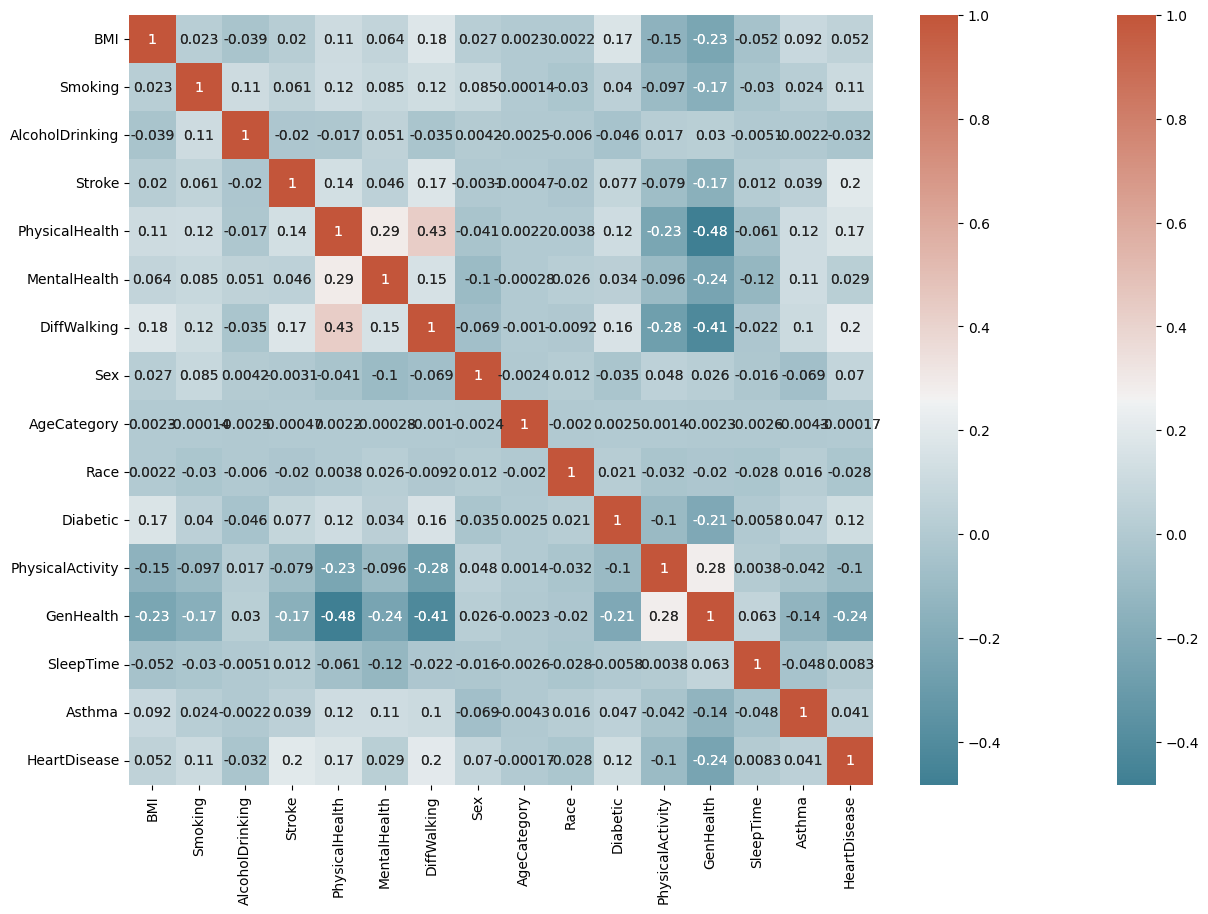

In [ ]:
# calculate correlation matrix
corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
model1 = LogisticRegression() # get instance of model
model1.fit(x_train, y_train) # Train/Fit model

y_pred1 = model1.predict(x_test) # get y predictions
print("The actual data is:")
print(np.array(y_test))
print("The predicted Data is :")
print(y_pred1)
score_lr = round(accuracy_score(y_pred1,y_test)*100,2)
score_lr1 = round(f1_score(y_pred1,y_test)*100,2)
score_lr2 = round(recall_score(y_pred1,y_test)*100,2)
score_lr3 = round(precision_score(y_pred1,y_test)*100,2)
print("Accuracy: "+str(score_lr)+" %")


The actual data is:
[0 0 0 ... 0 0 1]
The predicted Data is :
[0 0 0 ... 0 0 0]
Accuracy: 91.52 %


2. K-NN (K-Nearest Neighbors)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model2 = KNeighborsClassifier() # get instance of model
model2.fit(x_train, y_train) # Train/Fit model

y_pred2 = model2.predict(x_test) # get y predictions
print("The actual data is:")
print(np.array(y_test))
print("The predicted Data is :")
print(y_pred2)
score_knn = round(accuracy_score(y_pred2,y_test)*100,2)
score_knn1 = round(f1_score(y_pred2,y_test)*100,2)
score_knn2 = round(recall_score(y_pred2,y_test)*100,2)
score_knn3 = round(precision_score(y_pred2,y_test)*100,2)
print("Accuracy: "+str(score_knn)+" %")


The actual data is:
[0 0 0 ... 0 0 1]
The predicted Data is :
[0 0 0 ... 0 0 0]
Accuracy: 90.65 %


3. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model4 = GaussianNB() # get instance of model
model4.fit(x_train, y_train) # Train/Fit model

y_pred4 = model4.predict(x_test) # get y predictions
print("The actual data is:")
print(np.array(y_test))
print("The predicted Data is :")
print(y_pred4)
score_nb = round(accuracy_score(y_pred4,y_test)*100,2)
score_nb1 = round(f1_score(y_pred4,y_test)*100,2)
score_nb2 = round(recall_score(y_pred4,y_test)*100,2)
score_nb3 = round(precision_score(y_pred4,y_test)*100,2)
print("Accuracy: "+str(score_nb)+" %")


The actual data is:
[0 0 0 ... 0 0 1]
The predicted Data is :
[0 0 0 ... 0 0 0]
Accuracy: 84.54 %


4. Decision Trees


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model5 = DecisionTreeClassifier() # get instance of model
model5.fit(x_train, y_train) # Train/Fit model

y_pred5 = model5.predict(x_test) # get y predictions
print("The actual data is:")
print(np.array(y_test))
print("The predicted Data is :")
print(y_pred5)
score_dt = round(accuracy_score(y_pred5,y_test)*100,2)
score_dt1 = round(f1_score(y_pred5,y_test)*100,2)
score_dt2 = round(recall_score(y_pred5,y_test)*100,2)
score_dt3 = round(precision_score(y_pred5,y_test)*100,2)
print("Accuracy: "+str(score_dt)+" %")


The actual data is:
[0 0 0 ... 0 0 1]
The predicted Data is :
[0 0 0 ... 0 0 0]
Accuracy: 85.73 %


5. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model6 = RandomForestClassifier()# get instance of model
model6.fit(x_train, y_train) # Train/Fit model

y_pred6 = model6.predict(x_test) # get y predictions
print("The actual data is:")
print(np.array(y_test))
print("The predicted Data is :")
print(y_pred6)
score_rf = round(accuracy_score(y_pred6,y_test)*100,2)
score_rf1 = round(f1_score(y_pred6,y_test)*100,2)
score_rf2 = round(recall_score(y_pred6,y_test)*100,2)
score_rf3 = round(precision_score(y_pred6,y_test)*100,2)
print("Accuracy: "+str(score_rf)+" %")


The actual data is:
[0 0 0 ... 0 0 1]
The predicted Data is :
[0 0 0 ... 0 0 0]
Accuracy: 91.06 %


In [ ]:
scores = [score_lr,score_knn,score_nb,score_dt,score_rf]
algorithms = ["Logistic Regression","K-Nearest Neighbors","Naive Bayes","Decision Tree","Random Forest"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 91.52 %
The accuracy score achieved using K-Nearest Neighbors is: 90.65 %
The accuracy score achieved using Naive Bayes is: 84.54 %
The accuracy score achieved using Decision Tree is: 85.73 %
The accuracy score achieved using Random Forest is: 91.06 %


<Axes: xlabel='Accuracy score in %', ylabel='Algorithms'>

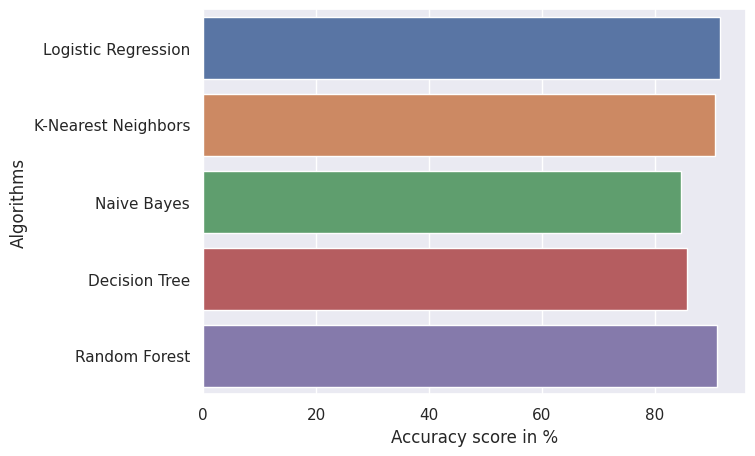

In [ ]:
sns.set(rc={'figure.figsize':(7,5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score in %")

sns.barplot(y=scores,x=algorithms)